# [RDKit](https://www.rdkit.org/) and Cheminformatics
Lecturers = R. Patrick Xian, Santosh Adhikari, Sourin Dey<br>
Date = 08/2022

## 1. Quantitative structure–activity relationship  (QSAR)
### 1.1 A brief history of QSAR

#### <font color='green'>Goal:</font> Build predictive models linking structure and (bio)activity for (mostly organic) molecules

#### <font color='green'>History:</font> [Corwin Hansch](https://en.wikipedia.org/wiki/Corwin_Hansch) (1918$-$2011), father of QSAR, spent most of his career at Pomona College, CA, USA

#### <font color='green'>Usage:</font>
- #### drug discovery -- given a target protein to bind, search for druglike molecules (aka. leads)
- #### synthesis prediction -- given reagents, predict synthesis outcome (product structure, ranking, etc)

#### <font color='green'>Transferrable concepts:</font> molecular representation, molecular similarity

## 2. [RDKit](https://github.com/rdkit) -- cheminformatics and predictive modelling toolkit
Data used here subsampled come from the GuacaMol dataset by [BenevolentAI](https://www.benevolent.com/),<br>
Brown et al., [GuacaMol: Benchmarking Models for de Novo Molecular Design](https://pubs.acs.org/doi/10.1021/acs.jcim.8b00839), JCIM (2019)

### 2.1 Chemical representation
#### ```SMILES``` (Simplified molecular-input line-entry system)
[David Weininger](https://en.wikipedia.org/wiki/David_Weininger), [SMILES, a chemical language and information system. 1. Introduction to methodology and encoding rules](https://doi.org/10.1021/ci00057a005) (1988)

#### Convert IUPAC name to SMILES string
The conversion is done using a [Chemical Identifier Resolver (CIR)](https://cactus.nci.nih.gov/chemical/structure)

In [1]:
try:
    import cirpy
except:
    !pip install cirpy
    import cirpy

In [2]:
chem_name = 'n-Octane'
cirpy.resolve(chem_name, 'smiles')

'CCCCCCCC'

#### Convert SMILES string to IUPAC

In [3]:
try:
    import pubchempy
except:
    !pip install pubchempy
    import pubchempy

In [4]:
compound = pubchempy.get_compounds('CCCCCCCC', namespace='smiles')
compound

[Compound(356)]

In [5]:
compound[0].iupac_name

'octane'

In [6]:
compound = pubchempy.get_compounds('COc1ccc(NC(=O)c2cccc(Cn3cc(Br)cn3)c2)cn1', namespace='smiles')
compound

[Compound(1235939)]

In [7]:
compound[0].iupac_name

'3-[(4-bromopyrazol-1-yl)methyl]-N-(6-methoxypyridin-3-yl)benzamide'

#### Molecular data type: ```Mol```

In [9]:
from rdkit import Chem

In [10]:
mol_smile = 'COc1ccc(NC(=O)c2cccc(Cn3cc(Br)cn3)c2)cn1'
mol = Chem.MolFromSmiles(mol_smile)

In [11]:
type(mol)

rdkit.Chem.rdchem.Mol

In [12]:
# Retrieve all methods and properties of the datatype
print(dir(mol))

['AddConformer', 'ClearComputedProps', 'ClearProp', 'Debug', 'GetAromaticAtoms', 'GetAtomWithIdx', 'GetAtoms', 'GetAtomsMatchingQuery', 'GetBondBetweenAtoms', 'GetBondWithIdx', 'GetBonds', 'GetBoolProp', 'GetConformer', 'GetConformers', 'GetDoubleProp', 'GetIntProp', 'GetNumAtoms', 'GetNumBonds', 'GetNumConformers', 'GetNumHeavyAtoms', 'GetProp', 'GetPropNames', 'GetPropsAsDict', 'GetRingInfo', 'GetSubstructMatch', 'GetSubstructMatches', 'GetUnsignedProp', 'HasProp', 'HasSubstructMatch', 'NeedsUpdatePropertyCache', 'RemoveAllConformers', 'RemoveConformer', 'SetBoolProp', 'SetDoubleProp', 'SetIntProp', 'SetProp', 'SetUnsignedProp', 'ToBinary', 'UpdatePropertyCache', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getinitargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__instance_size__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '

### 2.2 Drawing molecules
#### Kekulization
Kekulization is a class of bond-order assignment problem for molecules containing aromatic rings. It is unsolvable in general, but solutions to special cases exist. More details are explained in the following book<br>
Cyvin & Gutman, [Kekulé Structures in Benzenoid Hydrocarbons](https://link.springer.com/book/10.1007/978-3-662-00892-8), Springer (1988)

<br>
The following slide is borrowed from Noel M. O'Boyle at Sosei Heptares, Cambridge, UK

<img src="Kekulization.png" alt="isolated" width="800"/>

#### Examples showing the effects of drawing options in RDKit
Set drawing options, see all options [here](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.MolDrawing.html).

In [13]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw.MolDrawing import DrawingOptions

# Set drawing options
DrawingOptions.bondLineWidth = 2
DrawingOptions.atomLabelFontSize = 15
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.useFraction = 1.

Drawing without Kekulization

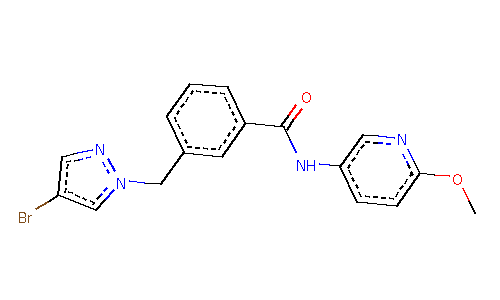

In [14]:
mol_smile = 'COc1ccc(NC(=O)c2cccc(Cn3cc(Br)cn3)c2)cn1'
mol = Chem.MolFromSmiles(mol_smile)
Draw.MolToImage(mol, fitImage=True, kekulize=False, size=(500, 300))

Drawing with Kekulization

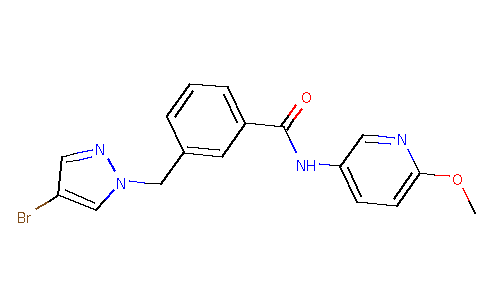

In [15]:
Draw.MolToImage(mol, fitImage=True, kekulize=True, size=(500, 300))

Drawing with Kekulization and numbering (according to the path underlying the SMILES string)

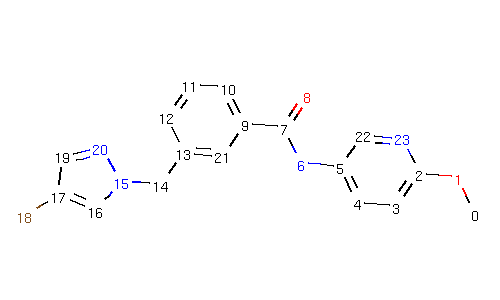

In [16]:
DrawingOptions.includeAtomNumbers = True
Draw.MolToImage(mol, fitImage=True, kekulize=True, size=(500, 300))

### 2.3 Chemical descriptors

In [17]:
from rdkit.Chem import Descriptors as D

In [18]:
print(dir(D))

['BalabanJ', 'BertzCT', 'Chem', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHet

#### Wildman-Crippen LogP ([octanol−water partition coefficient](https://en.wikipedia.org/wiki/Octanol-water_partition_coefficient)) value
The LogP is a measure of lipophilicity and a fundamental quantity in the field of QSAR.<br>
The Wildman-Crippen method for calculating LogP is described in the following publication,<br>
Wildman & Crippen, [Prediction of Physicochemical Parameters by Atomic Contributions](https://doi.org/10.1021/ci990307l), JCICS (1999)

In [19]:
D.MolLogP(Chem.MolFromSmiles('CCCCC'))

2.1965000000000003

### 2.3 A concrete example -- [Wiener index](https://en.wikipedia.org/wiki/Wiener_index)
Boiling point predictor for linear (C$_n$H$_{2n+2}$) and branched alkanes/paraffins<br>
[Harry Wiener](https://en.wikipedia.org/wiki/Harry_Wiener), [Structural Determination of Paraffin Boiling Points](https://pubs.acs.org/doi/abs/10.1021/ja01193a005), J. Am. Chem. Soc. 69, 17 (1947)

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
data = pd.read_excel(r'.\tables_alkane_temperatures.xlsx')
data

,Name,Boiling point,Melting point
0,ethane,-88.630,-183.27
1,propane,-42.070,-187.69
2,butane,-0.500,-138.35
3,2-methylpropane,-11.730,-159.60
4,pentane,36.074,-129.72
...,...,...,...
69,"2,4-dimethyl-3-ethylpentane",136.730,-122.20
70,"2,2,3,3-tetramethylpentane",140.274,-9.90
71,"2,2,3,4-tetramethylpentane",133.016,-121.09
72,"2,2,4,4-tetramethylpentane",122.284,-66.54


The Wiener index ($W$) is calculated using the [distance matrix](https://en.wikipedia.org/wiki/Distance_matrix) ($D$) of the molecular graph,
$W = \frac{1}{2}\sum_{i,j}D_{i,j}$<br>
Plavsic et al., [On the Harary index for the characterization of chemical graphs](https://link.springer.com/article/10.1007/BF01164638), J. Math. Chem. (1993)

In [22]:
# Calculate the Wiener index
def wiener_index(m):
    res = 0
    mol = Chem.MolFromSmiles(m)
    amat = Chem.GetDistanceMatrix(mol)
    num_atoms = mol.GetNumAtoms()
    for i in range(num_atoms):
        for j in range(i+1,num_atoms):
            res += amat[i][j]
    return res

Convert IUPAC names to SMILES using ```cirpy```

In [23]:
smiles = [cirpy.resolve(name, 'smiles') for name in data['Name']]

In [24]:
print(smiles)

['CC', 'CCC', 'CCCC', 'CC(C)C', 'CCCCC', 'CCC(C)C', 'CC(C)(C)C', 'CCCCCC', 'CCCC(C)C', 'CCC(C)CC', 'CCC(C)(C)C', 'CC(C)C(C)C', 'CCCCCCC', 'CCCCC(C)C', 'CCCC(C)CC', 'CCC(CC)CC', 'CCCC(C)(C)C', 'CCC(C)C(C)C', 'CC(C)CC(C)C', 'CCC(C)(C)CC', 'CC(C)C(C)(C)C', 'CCCCCCCC', 'CCCCCC(C)C', 'CCCCC(C)CC', 'CCCC(C)CCC', 'CCCC(CC)CC', 'CCCCC(C)(C)C', 'CCCC(C)C(C)C', 'CCC(C)CC(C)C', 'CC(C)CCC(C)C', 'CCCC(C)(C)CC', 'CCC(C)C(C)CC', 'CCC(CC)C(C)C', 'CCC(C)(CC)CC', 'CCC(C)C(C)(C)C', 'CC(C)CC(C)(C)C', 'CCC(C)(C)C(C)C', 'CC(C)C(C)C(C)C', 'CC(C)(C)C(C)(C)C', 'CCCCCCCCC', 'CCCCCCC(C)C', 'CCCCCC(C)CC', 'CCCCC(C)CCC', 'CCCCC(CC)CC', 'CCCC(CC)CCC', 'CCCCCC(C)(C)C', 'CCCCC(C)C(C)C', 'CCCC(C)CC(C)C', 'CCC(C)CCC(C)C', 'CC(C)CCCC(C)C', 'CCCCC(C)(C)CC', 'CCCC(C)C(C)CC', 'CCC(C)CC(C)CC', 'CCCC(C)(C)CCC', 'CCCC(CC)C(C)C', 'CCC(CC)CC(C)C', 'CCCC(C)(CC)CC', 'CCC(C)C(CC)CC', 'CCCC(C)C(C)(C)C', 'CCC(C)CC(C)(C)C', 'CC(C)CCC(C)(C)C', 'CCCC(C)(C)C(C)C', 'CCC(C)C(C)C(C)C', 'CC(C)CC(C)C(C)C', 'CCC(C)(C)CC(C)C', 'CCC(C)C(C)(C)CC

Calculate the Wiener index for each tabulated compound

In [25]:
wiener_index(smiles[-1])

84.0

In [26]:
wi = [wiener_index(smile) for smile in smiles]
print(wi)

[1.0, 4.0, 10.0, 9.0, 20.0, 18.0, 16.0, 35.0, 32.0, 31.0, 28.0, 29.0, 56.0, 52.0, 50.0, 48.0, 46.0, 46.0, 48.0, 44.0, 42.0, 84.0, 79.0, 76.0, 75.0, 72.0, 71.0, 70.0, 71.0, 74.0, 67.0, 68.0, 67.0, 64.0, 63.0, 66.0, 62.0, 65.0, 58.0, 120.0, 114.0, 110.0, 108.0, 104.0, 102.0, 104.0, 102.0, 102.0, 104.0, 108.0, 98.0, 98.0, 100.0, 96.0, 96.0, 98.0, 92.0, 94.0, 92.0, 94.0, 98.0, 90.0, 92.0, 96.0, 92.0, 88.0, 88.0, 88.0, 86.0, 90.0, 82.0, 86.0, 88.0, 84.0]


Visualize the relationship between the Wiener index and the boiling point

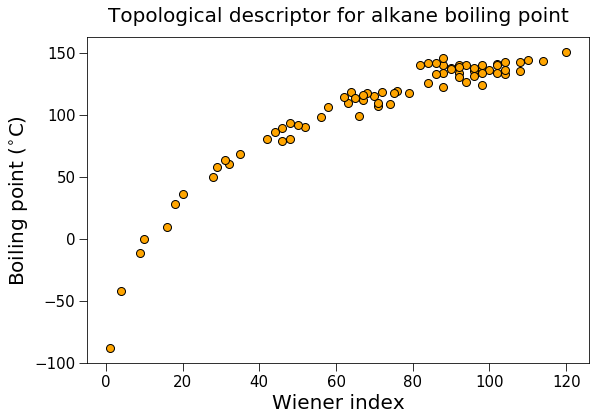

In [42]:
f, _ = plt.subplots(figsize=(9, 6))
plt.plot(wi, data['Boiling point'], 'o', color='k', mfc='orange', ms=8, linewidth=2)
plt.tick_params(which='both', length=8, labelsize=15)
plt.xlabel('Wiener index', fontsize=20)
plt.ylabel('Boiling point ($^{\circ}$C)', fontsize=20)
plt.title('Topological descriptor for alkane boiling point', fontsize=20, pad=15)
plt.savefig('Wiener_index.png', dpi=300, bbox_inches='tight', transparent=True);